### Assignment

### Traverse Quad Mesh in a Straight Line

In [1]:
import os
import compas

from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

HERE = os.path.dirname(os.path.abspath('')) #HERE = os.path.dirname(__file__)
DATA = os.path.join(HERE, 'examples/data')
FILE = os.path.join(DATA, 'faces.obj')

mesh = Mesh.from_obj(FILE)

plotter = MeshPlotter(mesh, figsize=(4, 4))

plotter.draw_vertices()
plotter.draw_edges()
plotter.draw_faces()

plotter.show()

<Figure size 400x400 with 1 Axes>

Visualize additionally the vertices on the boundary and label with their identifier.

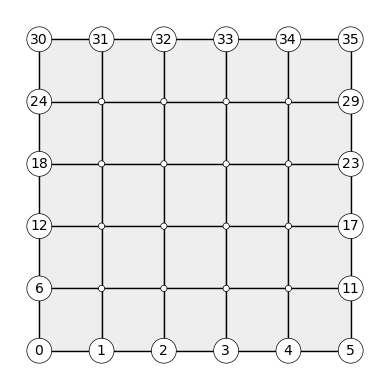

In [2]:
plotter = MeshPlotter(mesh, figsize=(4, 4))

plotter.draw_vertices()
plotter.draw_edges()
plotter.draw_faces()

plotter.draw_vertices(radius=0.4, text='key', keys=list(mesh.vertices_on_boundary()))

plotter.show()

### Select one vertex on the boundary

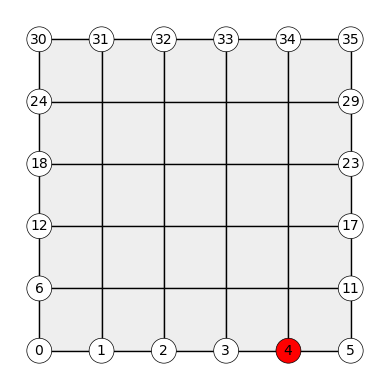

In [3]:
start = 4

plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=list(mesh.vertices_on_boundary()), facecolor={start: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

### Find the neighbours of this vertex

In [4]:
nbrs = mesh.vertex_neighbors(start)
print(nbrs)

[3, 10, 5]


Visualize the start vertex and its neighbors and label with their identifier.

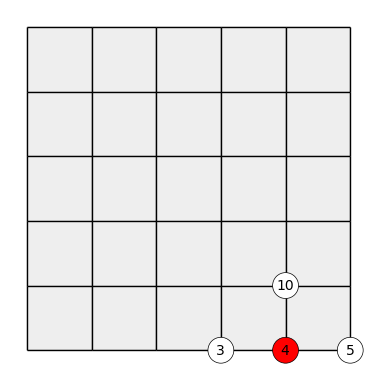

In [5]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[start] + nbrs, facecolor={start: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

### Find the neighbour not on the boundary

In [6]:
for nbr in nbrs:
    print(nbr, mesh.is_vertex_on_boundary(nbr))

3 True
10 False
5 True


In [7]:
current = start
for nbr in nbrs:
    if not mesh.is_vertex_on_boundary(nbr):
        previous, current = current, nbr
        break
print(previous, current)

4 10


### Find the neighbours of this vertex in cycling order

In [8]:
nbrs = mesh.vertex_neighbors(current, ordered=True)
print(nbrs)

[4, 9, 16, 11]


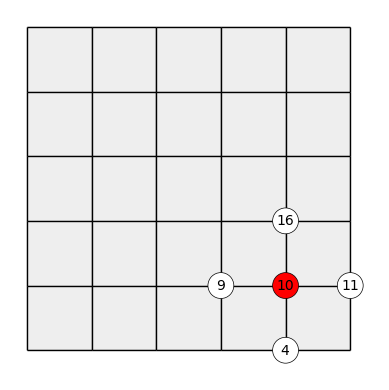

In [9]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[current] + nbrs, facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

### Find the opposite neighbour of the previous vertex

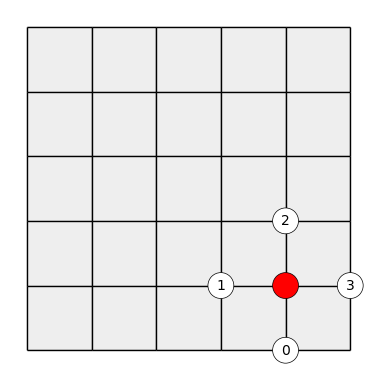

In [10]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4,
    text={key: index for index, key in enumerate(nbrs)},
    keys=[current] + nbrs,
    facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

In [11]:
i = nbrs.index(previous)
print(i)

0


In [12]:
previous, current = current, nbrs[i - 2]
print(previous, current)

10 16


In [13]:
nbrs = mesh.vertex_neighbors(current, ordered=True)

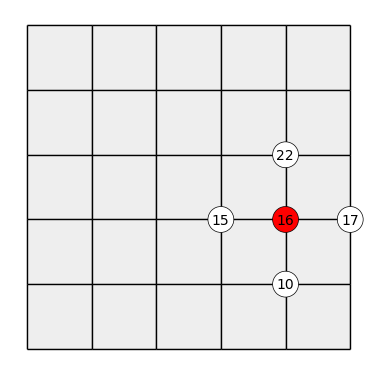

In [14]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[current] + nbrs, facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

In [28]:
start = 17

path = [start]
current_nbrs = mesh.vertex_neighbors(start)

current = start
for nbr in current_nbrs:
    if not mesh.is_vertex_on_boundary(nbr):
        previous, current = current, nbr
        break

while True:
    path.append(current)
    if mesh.is_vertex_on_boundary(current):
        break
    nbrs = mesh.vertex_neighbors(current, ordered=True)
    i = nbrs.index(previous)
    previous, current = current, nbrs[i - 2]

print(path)


[17, 16, 15, 14, 13, 12]


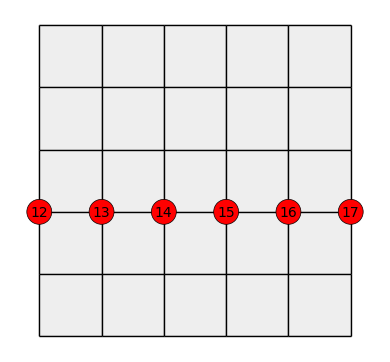

In [27]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=path, facecolor=(255, 0, 0))
plotter.draw_edges()
plotter.draw_faces()
plotter.show()